# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US.

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this [link](https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/EhWeqeQsh-9Mr1fneZc9_0sBOBzEdXngvxFJtAlIa-eAgA?e=8ukWwa). Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following [link](https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ).

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents.


### 1. Determine if and why ML is an appropriate solution to deploy.

# Write your answer here and turn the cell type into markdown
```

**Why ML is appropriate**


*   ML is appropriate because it can identify hidden patterns and insights from
complex historical data.
*   We need to develope an automated system for immidiate prediction in booking time
*   It can process thousands of flights booking simultaneously so it is scalable also.

* We can continuely improve model because we can update models on new flights data as well.

* Cost and Time saving




```


### 2. Formulate the business problem, success metrics, and desired ML output.

# Write your answer here and turn the cell type into markdown
```

** Business Problem **
Aim is to develope a binary classification model
that can predict whether a scheduled
flights will experience
weather related delays based on
historical flights data , airline information,
temporal factor and route characteristics.


** Success Metrics **
- ML Metrics
We will evcaluate model using accuracy scores, f1-score, precision, recall, roc curve and confusion metrics.

- Business Metrics
It will reduce customer service calls about delays, improved booking conversion rate and customer satisfaction.

** Desired ML output **
It is probablity score (0,1) indicating likelyhood of flight delay for each flight booking uisng binary classification models based on optimal threshhold.

```

### 3. Identify the type of ML problem you’re dealing with.

```
# Write your answer here and turn the cell type into markdown
This is binary classification problem in which our target is to predict delays in flight. O shows no delay and 1 shows delay.

```

**Why ML is appropriate**


*   ML is appropriate because it can identify hidden patterns and insights from
complex historical data.
*   We need to develope an automated system for immidiate prediction in booking time
*   It can process thousands of flights booking simultaneously so it is scalable also.

* We can continuely improve model because we can update models on new flights data as well.

* Cost and Time saving




** Business Problem **
Aim is to develope a binary classification model
that can predict whether a scheduled
flights will experience
weather related delays based on
historical flights data , airline information,
temporal factor and route characteristics.


** Success Metrics **
- ML Metrics
We will evcaluate model using accuracy scores, f1-score, precision, recall, roc curve and confusion metrics.

- Business Metrics
It will reduce customer service calls about delays, improved booking conversion rate and customer satisfaction.

** Desired ML output **
It is probablity score (0,1) indicating likelyhood of flight delay for each flight booking uisng binary classification models based on optimal threshhold.


### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [6]:
pip install pathlib2

In [7]:
import os
from pathlib2 import Path
from zipfile import ZipFile
import time
import zipfile
import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# <please add any other library or function you are aiming to import here>


# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features?

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [8]:
# download the files

# <note: make them all relative, absolute path is not accepted>
zip_path = '/content/data_compressed.zip'   #
base_path = '/content/'
csv_base_path = '/content/csv_data/'

# create output directory
!mkdir -p {csv_base_path}

#### Extract CSV files from ZIP files

In [9]:

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(csv_base_path)
    zip_files = zip_ref.namelist()

print(f"Extracted {len(zip_files)} files:")
print(zip_files[:10])

def zip2csv(zip_file_name, output_dir):
    try:
        with zipfile.ZipFile(zip_file_name, 'r') as z:
            z.extractall(output_dir)
        print(f"Extracted nested zip: {zip_file_name}")
    except Exception as e:
        print(f"Failed to extract {zip_file_name}: {e}")
for file in zip_files:
    if file.endswith('.zip'):
        nested_zip_path = os.path.join(csv_base_path, file)
        zip2csv(nested_zip_path, csv_base_path)

Extracted 60 files:
['data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip', 'data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_10.zip', 'data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip', 'data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip', 'data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip', 'data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip', 'data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_4.zip', 'data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5.zip', 'data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_6.zip', 'data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_7.zip']
Extracted nested zip: /content/csv_data/data_compressed/On_Time_Reporting_Carrier_On_T

In [ ]:
# How many csv files have we extracted? write a code to answer it.
# Extracted 60 files and code is in previous cell

Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [11]:
from IPython.display import HTML, display

file_path = "/content/csv_data/readme.html"
with open(file_path, 'r') as file:
    html_content = file.read()
    display(HTML(html_content))

#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [12]:
df_temp = pd.read_csv("/content/csv_data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv") # **ENTER YOUR CODE HERE**

**Question**: Print the row and column length in the dataset, and print the column names.

In [13]:
df_shape = df_temp.shape # **ENTER YOUR CODE HERE**
print(f'Rows and columns in one csv file is {df_shape}')

Rows and columns in one csv file is (585749, 110)


**Question**: Print the first 10 rows of the dataset.  

In [14]:
# Enter your code here
df_temp.head(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2018,3,9,3,1,2018-09-03,9E,20363,9E,N908XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,3,9,9,7,2018-09-09,9E,20363,9E,N315PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,3,9,10,1,2018-09-10,9E,20363,9E,N582CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,3,9,13,4,2018-09-13,9E,20363,9E,N292PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,3,9,14,5,2018-09-14,9E,20363,9E,N600LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018,3,9,16,7,2018-09-16,9E,20363,9E,N316PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018,3,9,17,1,2018-09-17,9E,20363,9E,N916XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018,3,9,20,4,2018-09-20,9E,20363,9E,N371CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018,3,9,21,5,2018-09-21,9E,20363,9E,N601LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018,3,9,23,7,2018-09-23,9E,20363,9E,N906XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [15]:
print(f'The column names are :')
print('#########')
for col in df_temp.columns:# **ENTER YOUR CODE HERE**
    print(col)

The column names are :
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not.

For example: `5 in [1,2,3,4,5]`

In [16]:
del_cols = [col for col in df_temp.columns if 'Del' in col]

print("The columns having 'Del' are : ")

for col in del_cols:
    print(col)

The columns having 'Del' are : 
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
DivArrDelay


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [17]:
# to answer above questions, complete the following code
print("The #rows and #columns are ", df_temp.shape[0], " and ", df_temp.shape[1])
print("The years in this dataset are: ", sorted(df_temp['Year'].unique()))
print("The months covered in this dataset are: ", sorted(df_temp['Month'].unique()))
print("The date range for data is :", df_temp['FlightDate'].min(), " to ", df_temp['FlightDate'].max())
print("The airlines covered in this dataset are: ", list(df_temp['Reporting_Airline'].unique()))
print("The Origin airports covered are: ", list(df_temp['Origin'].unique()))
print("The Destination airports covered are: ", list(df_temp['Dest'].unique()))

The #rows and #columns are  585749  and  110
The years in this dataset are:  [np.int64(2018)]
The months covered in this dataset are:  [np.int64(9)]
The date range for data is : 2018-09-01  to  2018-09-30
The airlines covered in this dataset are:  ['9E', 'B6', 'WN', 'YV', 'YX', 'EV', 'AA', 'AS', 'DL', 'HA', 'UA', 'F9', 'G4', 'MQ', 'NK', 'OH', 'OO']
The Origin airports covered are:  ['DFW', 'LGA', 'MSN', 'MSP', 'ATL', 'BDL', 'VLD', 'JFK', 'RDU', 'CHS', 'DTW', 'GRB', 'PVD', 'SHV', 'FNT', 'PIT', 'RIC', 'RST', 'RSW', 'CVG', 'LIT', 'ORD', 'JAX', 'TRI', 'BOS', 'CWA', 'DCA', 'CHO', 'AVP', 'IND', 'GRR', 'BTR', 'MEM', 'TUL', 'CLE', 'STL', 'BTV', 'OMA', 'MGM', 'TVC', 'SAV', 'GSP', 'EWR', 'OAJ', 'BNA', 'MCI', 'TLH', 'ROC', 'LEX', 'PWM', 'BUF', 'AGS', 'CLT', 'GSO', 'BWI', 'SAT', 'PHL', 'TYS', 'ACK', 'DSM', 'GNV', 'AVL', 'BGR', 'MHT', 'ILM', 'MOT', 'IAH', 'SBN', 'SYR', 'ORF', 'MKE', 'XNA', 'MSY', 'PBI', 'ABE', 'HPN', 'EVV', 'ALB', 'LNK', 'AUS', 'PHF', 'CHA', 'GTR', 'BMI', 'BQK', 'CID', 'CAK', 'ATW'

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [18]:
counts = pd.DataFrame({
    'Origin': df_temp['Origin'].value_counts(),
    'Destination': df_temp['Dest'].value_counts()
})
counts

,Origin,Destination
ABE,303,303
ABI,169,169
ABQ,2077,2076
ABR,60,60
ABY,79,79
...,...,...
WRG,60,60
WYS,52,52
XNA,1004,1004
YAK,60,60


**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [19]:



counts.sort_values(by='Origin',ascending=False).head(15 )# Enter your code here



,Origin,Destination
ATL,31525,31521
ORD,28257,28250
DFW,22802,22795
DEN,19807,19807
CLT,19655,19654
LAX,17875,17873
SFO,14332,14348
IAH,14210,14203
LGA,13850,13850
MSP,13349,13347


**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

# yes this dataset has capabality to predict about delay but for that we need machine learning classifications model because dataset has output target value 0/1/.

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe

In [20]:
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    df = pd.DataFrame()

    for file in csv_files:
        try:

            temp = pd.read_csv(file, usecols=filter_cols, low_memory=False)
            for col, vals in zip(subset_cols, subset_vals):
                temp = temp[temp[col].isin(vals)]
            df = pd.concat([df, temp], ignore_index=True)
        except Exception as e:
            print(f"Skipped file {file} due to error: {e}")


    df.to_csv(file_name, index=False)
    return df



In [22]:
base_path = "/content/csv_data/"


cols = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
        'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
        'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
        'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

subset_vals = [
    ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'],
    ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'],
    ['UA', 'OO', 'WN', 'AA', 'DL']
]


Use the function above to merge all the different files into a single file that you can read easily.

**Note**: This will take 5-7 minutes to complete.

In [23]:
start = time.time()

csv_files = [os.path.join(base_path, f) for f in os.listdir(base_path) if f.endswith(".csv")]
combined_csv_filename = f"{base_path}combined_files.csv"

df_combined = combine_csv(csv_files, cols, subset_cols, subset_vals, combined_csv_filename)

print(f"CSVs merged successfully into {combined_csv_filename}")
print(f"Time taken: {round((time.time() - start)/60, 2)} minutes")


CSVs merged successfully into /content/csv_data/combined_files.csv
Time taken: 4.83 minutes


#### Load dataset

Load the combined dataset.

In [24]:
data = pd.read_csv("/content/csv_data/combined_files.csv")# Enter your code here to read the combined csv file.

Print the first 5 records.

In [25]:
data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,ArrDelay,ArrDelayMinutes,ArrDel15,Cancelled,Diverted,AirTime,Distance,DistanceGroup
0,2014,3,8,1,5,2014-08-01,AA,DFW,TX,ORD,IL,545,-1.0,0.0,0.0,0.0,0.0,116.0,802.0,4
1,2014,3,8,2,6,2014-08-02,AA,DFW,TX,ORD,IL,545,3.0,3.0,0.0,0.0,0.0,112.0,802.0,4
2,2014,3,8,3,7,2014-08-03,AA,DFW,TX,ORD,IL,545,-15.0,0.0,0.0,0.0,0.0,110.0,802.0,4
3,2014,3,8,4,1,2014-08-04,AA,DFW,TX,ORD,IL,545,-3.0,0.0,0.0,0.0,0.0,115.0,802.0,4
4,2014,3,8,5,2,2014-08-05,AA,DFW,TX,ORD,IL,545,-3.0,0.0,0.0,0.0,0.0,117.0,802.0,4


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [26]:
print("The #rows and #columns are ", data.shape[0], " and ", data.shape[1])
print("The years in this dataset are: ", list(data['Year'].unique()))
print("The months covered in this dataset are: ", sorted(list(data['Month'].unique())))
print("The date range for data is :" , data['FlightDate'].min(), " to ", data['FlightDate'].max())
print("The airlines covered in this dataset are: ", list(data['Reporting_Airline'].unique()))
print("The Origin airports covered are: ", list(data['Origin'].unique()))
print("The Destination airports covered are: ", list(data['Dest'].unique()))


The #rows and #columns are  1658130  and  20
The years in this dataset are:  [np.int64(2014), np.int64(2015), np.int64(2018), np.int64(2016), np.int64(2017)]
The months covered in this dataset are:  [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12)]
The date range for data is : 2014-01-01  to  2018-12-31
The airlines covered in this dataset are:  ['AA', 'DL', 'OO', 'UA', 'WN']
The Origin airports covered are:  ['DFW', 'IAH', 'DEN', 'PHX', 'ORD', 'SFO', 'LAX', 'ATL', 'CLT']
The Destination airports covered are:  ['ORD', 'IAH', 'DFW', 'DEN', 'PHX', 'SFO', 'LAX', 'ATL', 'CLT']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [27]:

data.rename(columns={'ArrDel15': 'is_delay'}, inplace=True)

print(data.columns)


Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'Cancelled',
       'Diverted', 'AirTime', 'Distance', 'DistanceGroup'],
      dtype='object')


Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [28]:

null_cols = df_combined.isnull().sum(axis=0)
print("Number of null values in each column:")
print(null_cols)

Number of null values in each column:
Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
FlightDate               0
Reporting_Airline        0
Origin                   0
OriginState              0
Dest                     0
DestState                0
CRSDepTime               0
ArrDelay             22540
ArrDelayMinutes      22540
ArrDel15             22540
Cancelled                0
Diverted                 0
AirTime              22540
Distance                 0
DistanceGroup            0
dtype: int64


The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [29]:

data= data[~data['ArrDelayMinutes'].isnull()]
data = data[~data['AirTime'].isnull()]
print("Shape after removing nulls:", data.shape)


Shape after removing nulls: (1635590, 20)


Get the hour of the day in 24-hour time format from CRSDepTime.

In [30]:
data['DepHourofDay'] = data['CRSDepTime'] // 100
 # Enter your code here

## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?

Yes we can predict it using machine learning models
- Because the target variable takes only 0/1 value, you could use a classification algorithm.

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

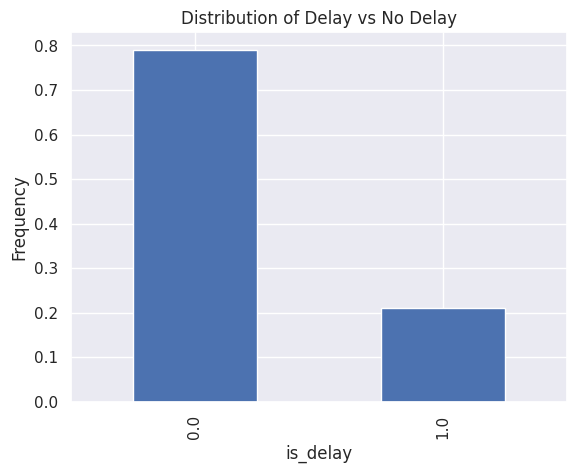

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

(data.groupby('is_delay').size() / len(data)).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Distribution of Delay vs No Delay')
plt.show()

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

According to bar plot, ratio of non-delay is more than delay. It means mostly (80%) flights are on time and 20% delayed based on this dataset. Data looks imbalanced

**Questions**:

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

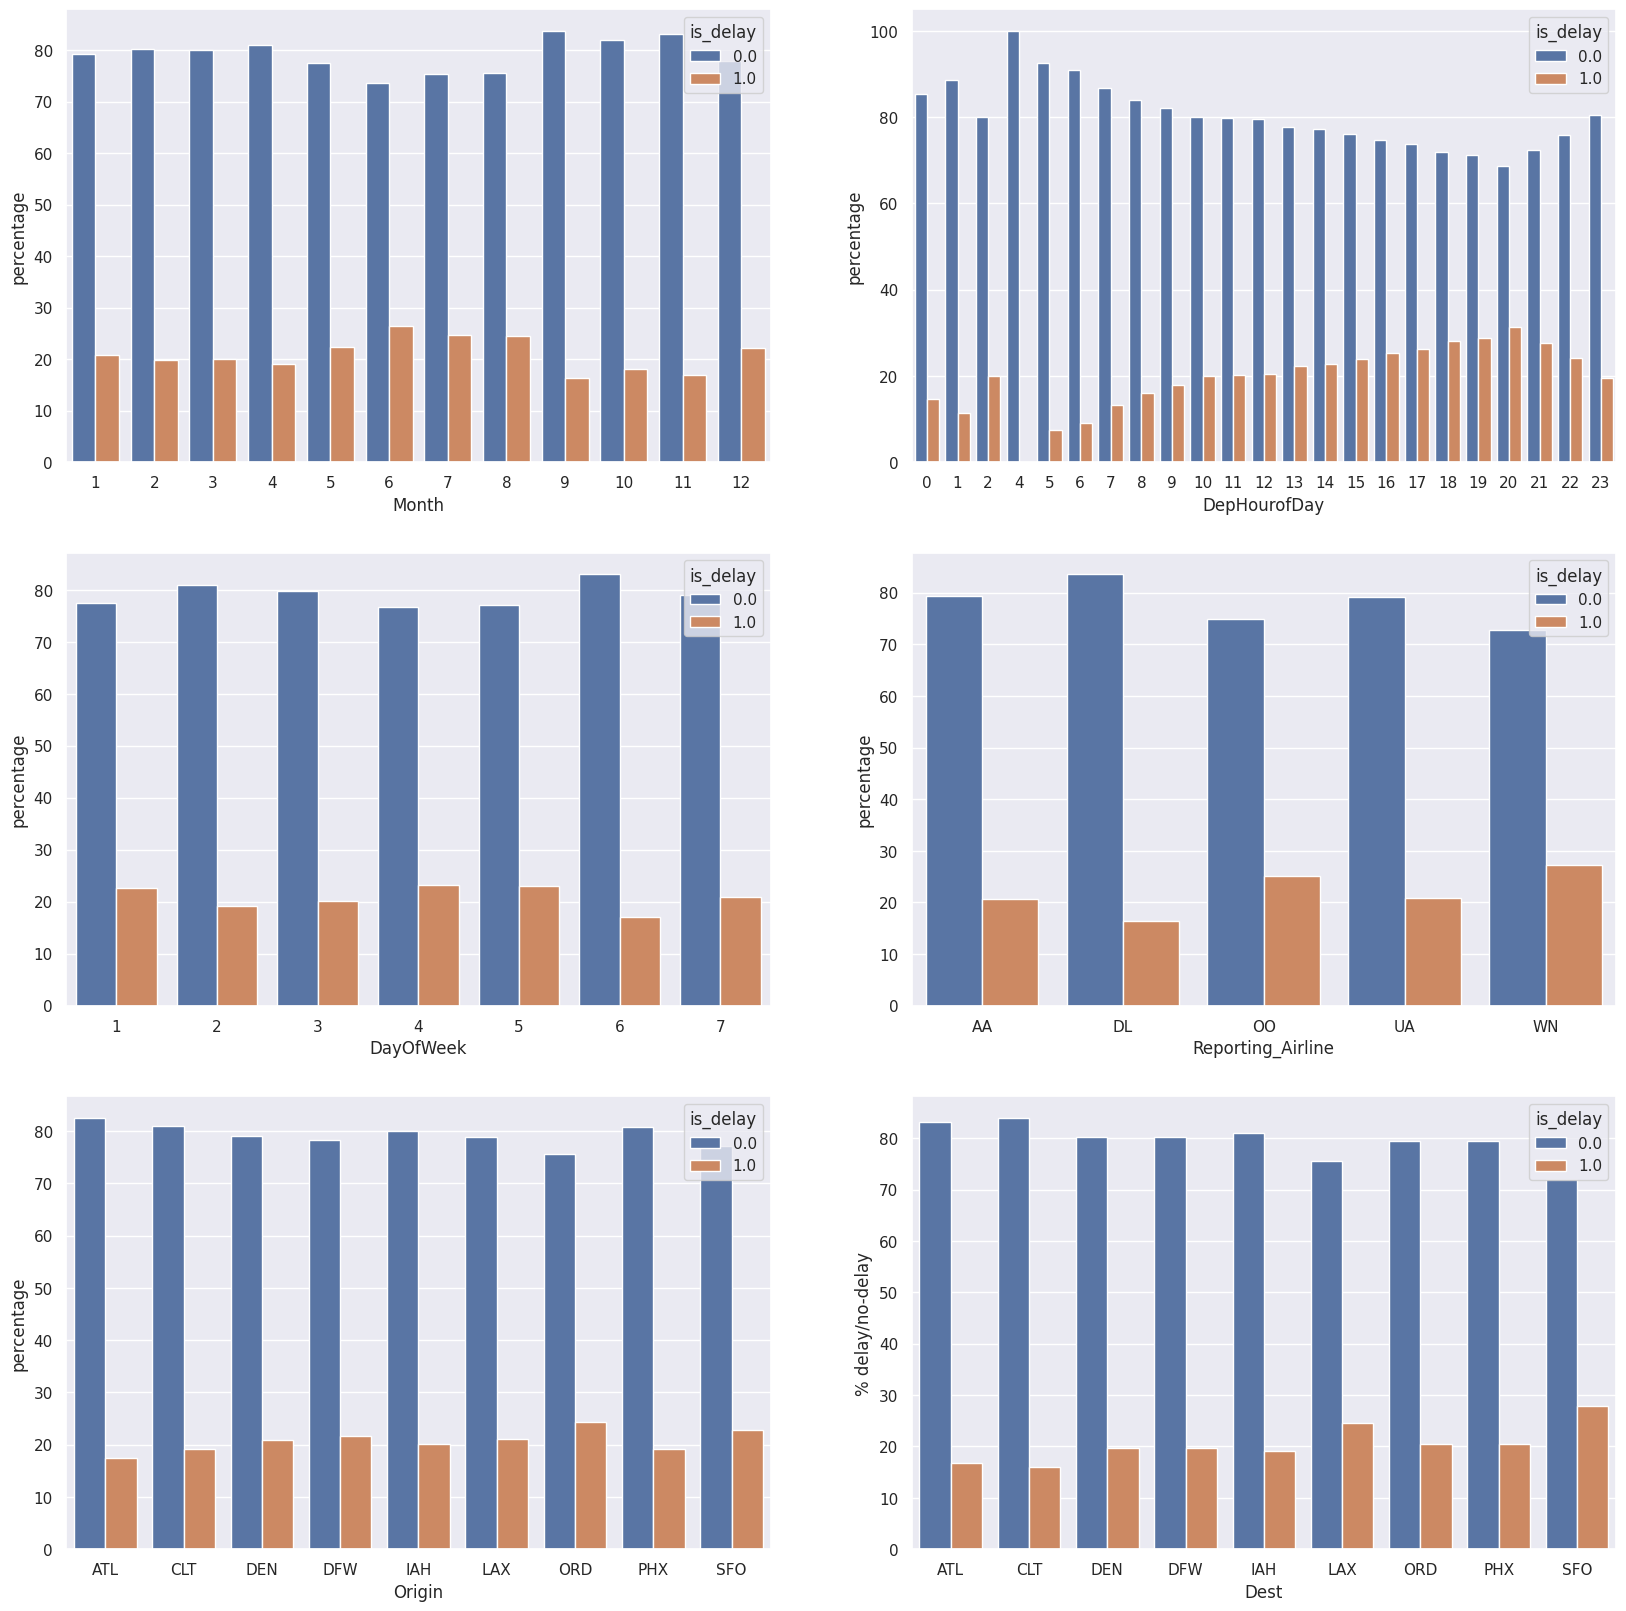

In [32]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')


plt.show()

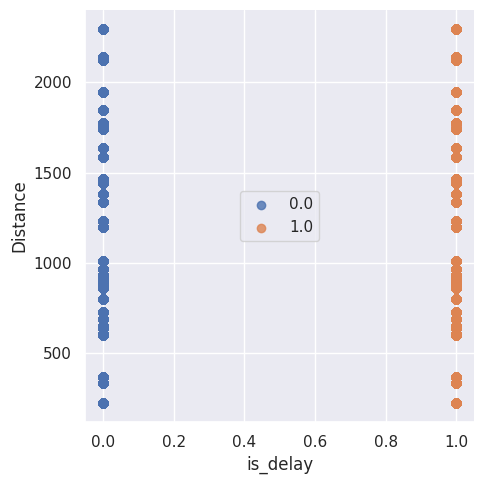

In [33]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Based on the above figures, enter your answers to the above questions here and turn the cell type to markdow
Q1: Which months have the most delays?
Ans: June, July, and December has highest flight delays.
Q2: What time of the day has the most delays?
Ans: Afternoon and evening hours from 2:00 PM to 11 PM has most flight delays.
Q3: What day of the week has the most delays?
Ans: Friday has the most flight delays.
Q4: Which airline has the most delays?
Ans: SW(South West) Airline has most delays.
Q5: Which origin and destination airports have the most delays?
Ans: Orlando Internal airport has most delay at origin, while Los Angeles has more delays at destination.
Q6: Is flight distance a factor in the delays?
Ans: Distance is uniform for both 0 and 1. Its mean that alone distance is not important factor in delay.



### Features

Look at all the columns and what their specific types are.

In [34]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'Cancelled',
       'Diverted', 'AirTime', 'Distance', 'DistanceGroup', 'DepHourofDay'],
      dtype='object')

In [35]:
data.dtypes

,0
Year,int64
Quarter,int64
Month,int64
DayofMonth,int64
DayOfWeek,int64
FlightDate,object
Reporting_Airline,object
Origin,object
OriginState,object
Dest,object


Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [36]:
data_orig = data.copy()
data = data[[ 'is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay']]
categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']
for c in categorical_columns:
    data[c] = data[c].astype('category')# Enter your code here
print("Updated data types:")
print(data.dtypes)

Updated data types:
is_delay              float64
Quarter              category
Month                category
DayofMonth           category
DayOfWeek            category
Reporting_Airline    category
Origin               category
Dest                 category
Distance              float64
DepHourofDay         category
dtype: object


To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [37]:
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True) # Enter your code here
data = pd.concat([data, data_dummies], axis=1)
data.drop(categorical_columns,axis=1, inplace=True)

Check the length of the dataset and the new columnms.

In [38]:
print("Number of rows:", len(data))


Number of rows: 1635590


In [39]:
print("Number of columns:", len(data.columns))
print("Column names:", data.columns)

Number of columns: 94
Column names: Index(['is_delay', 'Distance', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airl

**Sample Answer:**
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [40]:
data.rename(columns={'is_delay': 'target'}, inplace=True)

In [ ]:
# write code to Save the combined csv file (combined_csv_v1.csv) to your local computer
# note this combined file will be used in part B
#output_path = '/content/combined_csv_v1.csv'
#data.to_csv(output_path, index=False)

#print(f"File saved successfully at: {output_path}")
#print(f"Shape of final dataset: {data.shape}")

File saved successfully at: /content/combined_csv_v1.csv
Shape of final dataset: (1635590, 94)


# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [61]:
# write Code here to split data into train, validate and test
X = data.drop(columns=['target'])
y = data['target']

train_data, test_data, train_label, test_label = train_test_split(X, y, test_size=0.2, random_state=42)


### Baseline classification model

In [62]:
# <write code here>

log_reg = LogisticRegression(max_iter =1000)

log_reg.fit(train_data, train_label)

LogisticRegression(max_iter=1000)

In [63]:
y_pred = log_reg.predict(test_data)


## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [64]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_labels, target_predicted):
    # Compute confusion matrix
    cm = confusion_matrix(test_labels, target_predicted)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [65]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(test_labels, predicted_probabilities):
    fpr, tpr, thresholds = roc_curve(test_labels, predicted_probabilities)
    auc = roc_auc_score(test_labels, predicted_probabilities)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

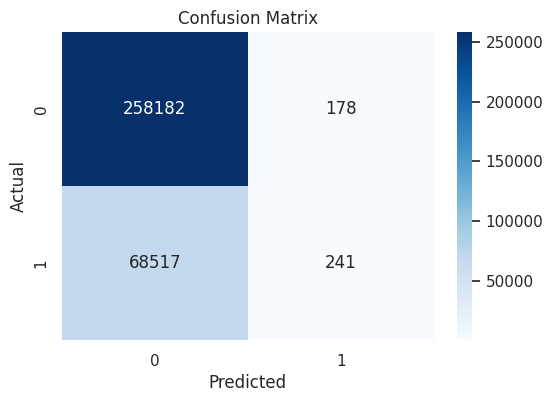

In [66]:

plot_confusion_matrix(test_label, y_pred)

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

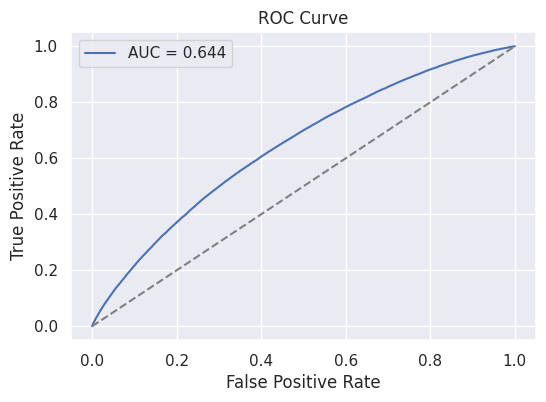

Accuracy     : 0.790
Precision    : 0.575
Recall (Sensitivity): 0.004
Specificity  : 0.999


In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, auc

y_pred = log_reg.predict(test_data)
y_prob = log_reg.predict_proba(test_data)[:, 1]

# Plot ROC curve
plot_roc_curve(test_label, y_prob)

# Metrics
accuracy = accuracy_score(test_label, y_pred)
precision = precision_score(test_label, y_pred)
recall = recall_score(test_label, y_pred)  # also known as sensitivity
tn, fp, fn, tp = confusion_matrix(test_label, y_pred).ravel()
specificity = tn / (tn + fp)

print(f"Accuracy     : {accuracy:.3f}")
print(f"Precision    : {precision:.3f}")
print(f"Recall (Sensitivity): {recall:.3f}")
print(f"Specificity  : {specificity:.3f}")


### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison?

Answer:
2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences?

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)?

Use the cells below to answer these and other questions. Insert and delete cells where needed.


**Question**: What can you summarize from the confusion matrix?


```

According to confusion matrix, the model shows significant bias in predicting class 1 which shows actual delays due to class imbalance represented by bar chart above. The model correctly classified 258,390 classes. Model is more better on predicting no delays due to more representation of non-delays class.
Model predicted almost 68495 incorrectly, they were actual delays but model predicted them as no delay.

```

-# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitHub repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitHub account, and ensure it is public.


# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance?
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [69]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ]
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25']
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18

### Add indicator variable for holidays
# Convert FlightDate to datetime if not already
data_orig['FlightDate'] = pd.to_datetime(data_orig['FlightDate'])

data_orig['is_holiday'] = data_orig['FlightDate'].dt.strftime('%Y-%m-%d').isin(holidays).astype(int)

Weather data was fetched from [this link](https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31).
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

In [ ]:
# download data from the link above and place it into the data folder

Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [70]:
weather = pd.read_csv("/content/daily-summaries-2025-10-26T11-25-11.csv") # Enter your code here to read 'daily-summaries.csv' file
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881']
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

station_map = dict(zip(station, airports))
# Map the station codes to airport codes
weather['airport'] = weather['STATION'].map(station_map)

Create another column called `MONTH` from the `DATE` column.

In [71]:
# Convert DATE to string and extract month
weather['MONTH'] = weather['DATE'].astype(str).apply(lambda x: x.split('-')[1])
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX,01
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX,01
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0,LAX,01
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0,LAX,01
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0,LAX,01


### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [72]:
weather.SNOW.fillna(0, inplace=True)
weather.SNWD.fillna(0, inplace=True)

# Check missing values across all columns
weather.isna().sum()

,0
STATION,0
DATE,0
AWND,0
PRCP,0
SNOW,0
SNWD,0
TAVG,62
TMAX,20
TMIN,20
airport,0


**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [73]:
idx = np.array([i for i in range(len(weather))])
TAVG_idx = idx[weather['TAVG'].isna()]
TMAX_idx = idx[weather['TMAX'].isna()]
TMIN_idx = idx[weather['TMIN'].isna()]
TAVG_idx

array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])

### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [74]:
weather_impute = weather.groupby(['STATION', 'MONTH']).agg({
    'TAVG': 'mean',
    'TMAX': 'mean',
    'TMIN': 'mean'
}).reset_index()
weather_impute.head(2)

,STATION,MONTH,TAVG,TMAX,TMIN
0,USW00003017,01,-2.741935,74.000000,-69.858065
1,USW00003017,02,11.219858,88.553191,-65.035461


Merge the mean data with the weather data.

In [75]:
### get the yesterday's data
weather = pd.merge(weather, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG',
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX',
                   'TMIN_x':'TMIN'})

Check for missing values again.

In [76]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

,0
STATION,0
DATE,0
AWND,0
PRCP,0
SNOW,0
SNWD,0
TAVG,0
TMAX,0
TMIN,0
airport,0


Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [77]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

Add the origin and destination weather conditions to the dataset.

In [79]:
data_orig['FlightDate'] = pd.to_datetime(data_orig['FlightDate'], errors='coerce')
weather['DATE'] = pd.to_datetime(weather['DATE'], errors='coerce')

In [80]:

data_orig = pd.merge(
    data_orig, weather,
    how='left',
    left_on=['FlightDate', 'Origin'],
    right_on=['DATE', 'airport']
).rename(columns={
    'AWND': 'AWND_O',
    'PRCP': 'PRCP_O',
    'TAVG': 'TAVG_O',
    'SNOW': 'SNOW_O'
}).drop(columns=['DATE', 'airport'])

# Add destination weather
data_orig = pd.merge(
    data_orig, weather,
    how='left',
    left_on=['FlightDate', 'Dest'],
    right_on=['DATE', 'airport']
).rename(columns={
    'AWND': 'AWND_D',
    'PRCP': 'PRCP_D',
    'TAVG': 'TAVG_D',
    'SNOW': 'SNOW_D'
}).drop(columns=['DATE', 'airport'])



**Note**: It is always a good practice to check nulls/NAs after joins.

In [81]:
sum(data.isna().any())

0

In [82]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'Cancelled',
       'Diverted', 'AirTime', 'Distance', 'DistanceGroup', 'DepHourofDay',
       'is_holiday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D',
       'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [85]:
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [86]:
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)

In [87]:
numeric_columns = ['Distance', 'AWND_O', 'PRCP_O', 'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']
data = pd.concat([data[['is_delay'] + numeric_columns], data_dummies], axis=1)

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [88]:
data.columns

Index(['is_delay', 'Distance', 'AWND_O', 'PRCP_O', 'TAVG_O', 'AWND_D',
       'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015', 'Year_2016',
       'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOf

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [89]:
data.rename(columns={'is_delay': 'target'}, inplace=True)# Enter your code here

In [90]:
# write code to Save the new combined csv file (combined_csv_v2.csv) to your local computer
# note this combined file will be also used in part B

data.to_csv('combined_csv_v2.csv', index=False)
#print("File saved as combined_csv_v2.csv")

Create the training and testing sets again.

In [91]:
# Enter your code here
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [92]:

classifier2 = LogisticRegression(max_iter=1000, solver='lbfgs')

In [93]:

classifier2.fit(X_train, y_train)

y_pred = classifier2.predict(X_test)
y_prob = classifier2.predict_proba(X_test)[:, 1]

Perform the evaluaion as you have done with the previous model and plot/show the same metrics

In [94]:
from sklearn import metrics
def plot_confusion_matrix(test_labels, target_predicted):
    cm = metrics.confusion_matrix(test_labels, target_predicted)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

def plot_roc(test_labels, target_predicted_probs):
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, target_predicted_probs)
    auc = metrics.roc_auc_score(test_labels, target_predicted_probs)

    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    accuracy = metrics.accuracy_score(test_labels, y_pred)
    precision = metrics.precision_score(test_labels, y_pred)
    recall = metrics.recall_score(test_labels, y_pred)
    sensitivity = recall
    specificity = metrics.recall_score(test_labels, y_pred, pos_label=0)

    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall (Sensitivity): {recall:.3f}")
    print(f"Specificity: {specificity:.3f}")
    print(f"AUC: {auc:.3f}")

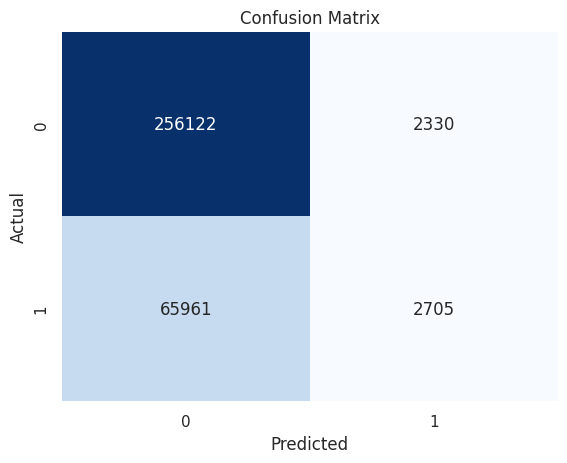

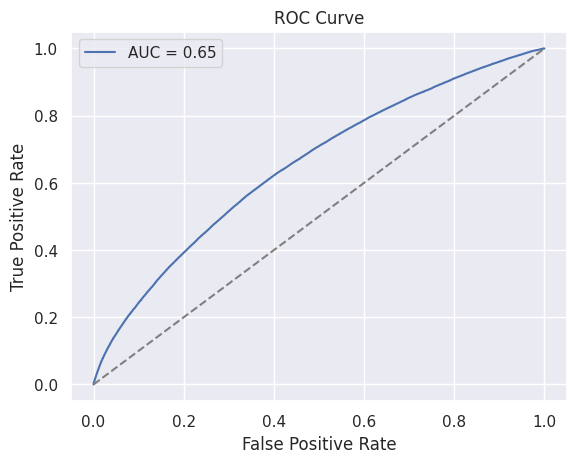

Accuracy: 0.791
Precision: 0.537
Recall (Sensitivity): 0.039
Specificity: 0.991
AUC: 0.653


In [95]:
plot_confusion_matrix(y_test, y_pred)
plot_roc(y_test, y_prob)

Question: did you notice a difference by adding the extra data on the results?

# Enter answer here and turn the cell type into markdown

```
 Yes there is notable positive difference in results after adding extra data to predict flight delays. Recall score jumps from 0.4% to 3.8% is very significant as compared to previous. Extra data addition hepled model to predict delays more effeciently but there is still need lot of improvement by using any class balance technique or resampling.

## initial accuracy without extra data

Accuracy     : 0.790
Precision    : 0.575
Recall (Sensitivity): 0.004
Specificity  : 0.999
Auc: 0.64

## Now after adding extra data:
Accuracy: 0.791
Precision: 0.539
Recall (Sensitivity): 0.038
Specificity: 0.991
AUC: 0.654
```


# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem.
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

In [ ]:
https://public.tableau.com/views/Flight_Delay_17616541834790/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link


## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

# write your answers here

```
Q1: Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
Ans: Although the performance is up to the mark even after doing features engineering, one-hot encoding, removing irrelevant features etc , only 4% increase in recall scores. First of all i will do data balancing and resampling technique because data is highly imbalanced. Secondly hyper parameter tunning and feature engineering such as (weather_severity, airport congestion etc.) to improve results.
Q2:To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
Ans: After adding external weather-related data, model area under the curve scores improved from 0.63 to 0.65, and recall from 0.4% to 3%. Most impactful techniqyes are feature engineering, one hot encoding and removing non-impactful features.
Q3: What were some of the biggest challenges you encountered throughout this project?
Ans: Biggest challenge is a size of dataset that i encountered throughout project.
Q4: What were the three most important things you learned about machine learning while completing this project?
Ans: How to handele large dataset
2: Impact of data imbalancing on recall
3: Data Modelling  and Feature engineering

```